In [420]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from string import punctuation
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

from utils import *

In [403]:
df_bernardo = pd.read_csv('data/bernardoArevalo.csv')
df_sandra = pd.read_csv('data/sandraTorres.csv')

In [404]:
# Limpieza de datos

df_bernardo = df_bernardo.drop(df_bernardo.columns[0], axis=1)	# Primera columna no es necesaria
df_bernardo = df_bernardo.apply(lambda x: x.astype(str).str.lower())	# convertir todo a minúscula
df_bernardo = df_bernardo.drop(['id'], axis=1)
df_bernardo = df_bernardo.drop(['id_str'], axis=1)
df_bernardo = df_bernardo.drop(['url'], axis=1)

# Eliminar signos de puntuacion
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: ''.join([i for i in x if i not in punctuation]))

# Eliminar @
df_bernardo['rawContent'] = df_bernardo['rawContent'].str.replace('@', '')
df_bernardo['rawContent'] = df_bernardo['rawContent'].str.replace('#', '')

# Eliminar emoji
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df_bernardo = df_bernardo[df_bernardo['lang'] == 'es']

match = lambda user_str: re.search(r"'username':\s*'([^']+)'", user_str)
username_from_str = lambda user_str: match(user_str).group(1) if match(user_str) else None
df_bernardo['tweet_username'] = df_bernardo['user'].apply(username_from_str)



In [405]:

# Limpieza de datos

df_sandra = df_sandra.drop(df_sandra.columns[0], axis=1)	# Primera columna no es necesaria
df_sandra = df_sandra.apply(lambda x: x.astype(str).str.lower())	# convertir todo a minúscula
if 'id' in df_sandra.columns:
    df_sandra = df_sandra.drop(['id'], axis=1)
if 'id_str' in df_sandra.columns:
    df_sandra = df_sandra.drop(['id_str'], axis=1)
df_sandra = df_sandra.drop(['url'], axis=1)

# Eliminar signos de puntuacion
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: ''.join([i for i in x if i not in punctuation]))

# Eliminar @
df_sandra['rawContent'] = df_sandra['rawContent'].str.replace('@', '')
df_sandra['rawContent'] = df_sandra['rawContent'].str.replace('#', '')

# Eliminar emoji
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df_sandra = df_sandra[df_sandra['lang'] == 'es']
df_sandra['tweet_username'] = df_sandra['user'].apply(username_from_str)



# Análisis exploratorio

## Frecuencia de palabras en tweets - Bernardo Arévalo

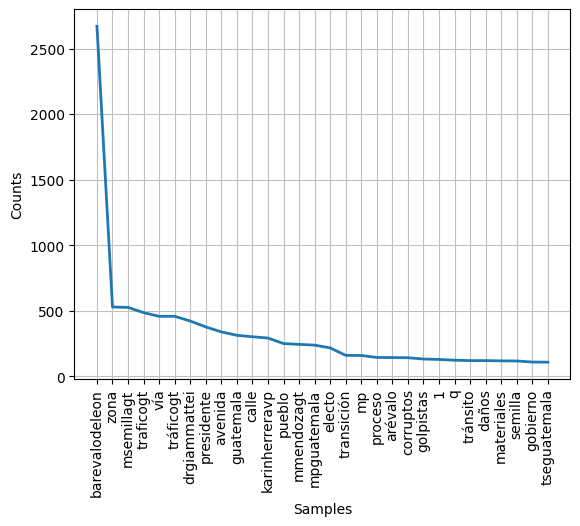

<Axes: xlabel='Samples', ylabel='Counts'>

In [421]:
tweet_words_bernardo = [w for sentence in df_bernardo['rawContent'] for w in sentence.split()]
nlp_words_bernardo =nltk.FreqDist(tweet_words_bernardo)
nlp_words_bernardo.plot(30)

En los tweets de Bernardo Arévalo, las palabras que más resaltan están relacionadas con él mismo, la vicepresidenta candidata Karin Herrera, el partido Semilla, temas presidenciales y el tráfico vehicular.

## Frecuencia de palabras en tweets - Sandra Torres

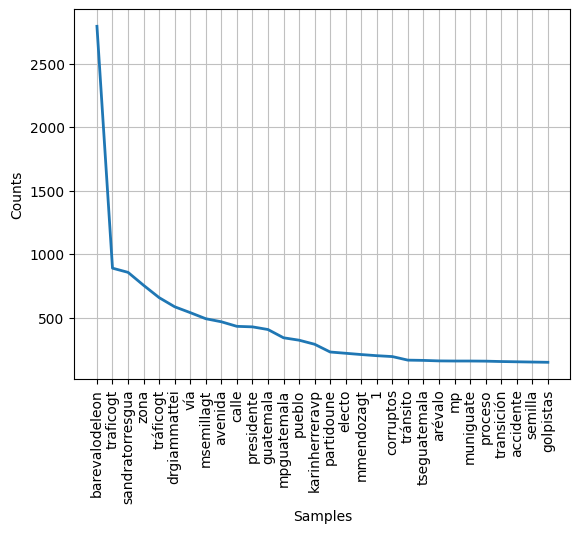

<Axes: xlabel='Samples', ylabel='Counts'>

In [423]:
tweet_words_sandra = [w for sentence in df_sandra['rawContent'] for w in sentence.split()]
nlp_words_sandra =nltk.FreqDist(tweet_words_sandra)
nlp_words_sandra.plot(30)

En el conjunto de datos de tweets de Sandra Torres se observa que sobresale la mención del usuario de Bernardo Arévalo, el tráfico automovilístico, la mención de Sandra Torres y la presidencia. En comparación con el conjunto de datos de tweets de Bernardo Arévalo se menciona más la palabra presidencia.

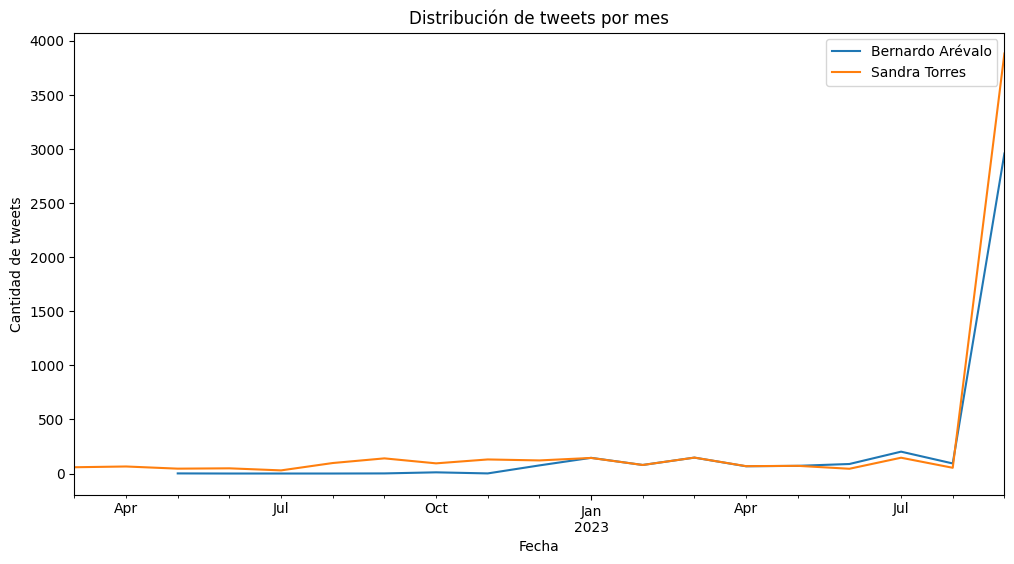

In [424]:
df_bernardo.loc[:, 'date'] = pd.to_datetime(df_bernardo['date'])
df_sandra.loc[:, 'date'] = pd.to_datetime(df_sandra['date'])

tweets_freq_month_b = df_bernardo.resample('M', on='date').size()
tweets_freq_month_s = df_sandra.resample('M', on='date').size()

plt.figure(figsize=(12, 6))
tweets_freq_month_b.plot(label='Bernardo Arévalo')
tweets_freq_month_s.plot(label='Sandra Torres')
plt.title('Distribución de tweets por mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de tweets')
plt.legend()
plt.show()


Se observa que los tweets que involucran tanto a Bernardo Arévalo como Sandra Torres tuvieron su pico más alto en agosto del 2023. Aunque los tweets que involucran a Sandra Torres han tenido una frecuencia ligeramente mayor, los hallazgos anteriores sugieren que una gran proporción de estos está relacionada con Bernardo Arévalo y el partido Semilla.